In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [44]:
sns.set_theme()

In [36]:
def load_data_files(data_dir):
    data = None
    for file in os.listdir(data_dir):
        run = pd.read_csv(os.path.join(data_dir, file))
        if data is None:
            data = run
        else:
            data = data.append(run, ignore_index=True)
    return data

In [37]:
run30_39 = load_data_files("data/cmaes/run30_39")
run30_39

,Wall time,Step,Value
0,1.641224e+09,4,-520.313049
1,1.641224e+09,14,-255.455475
2,1.641224e+09,15,-264.315399
3,1.641224e+09,18,-228.703415
4,1.641224e+09,19,-244.338760
...,...,...,...
9995,1.641224e+09,3489,-158.359879
9996,1.641224e+09,3491,-149.151459
9997,1.641224e+09,3493,-139.311188
9998,1.641224e+09,3496,-153.521103


<AxesSubplot:xlabel='Step', ylabel='Value'>

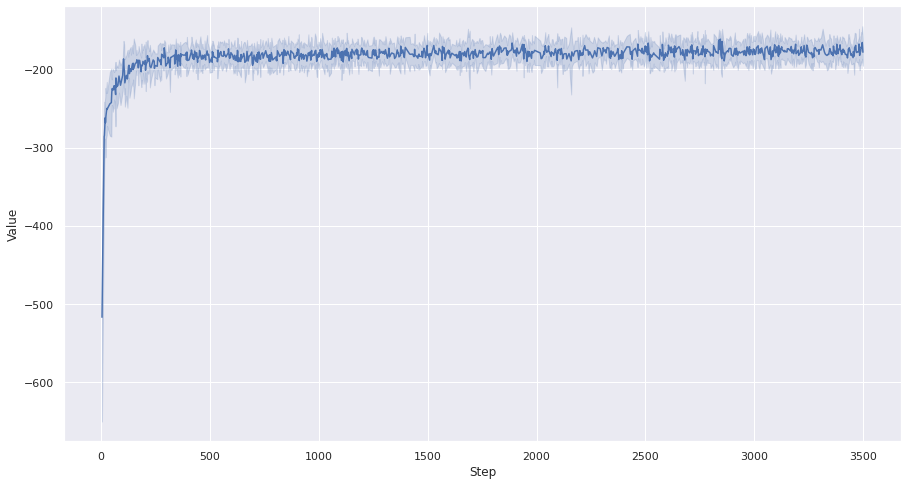

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=run30_39, x="Step", y="Value", ax=ax, ci="sd")

Average reward at last step

In [50]:
run30_39.query("Step == 3499")["Value"].mean()

-177.94925994873046